# <span style="color:purple; font-weight:bold">Categorical Variables

   **When we have categorical variables in the data we need to encode it to numbers because linear regression takes numerical inputs.**

---

## <span style="color:orange; font-weight:semibold">Types of Encoding

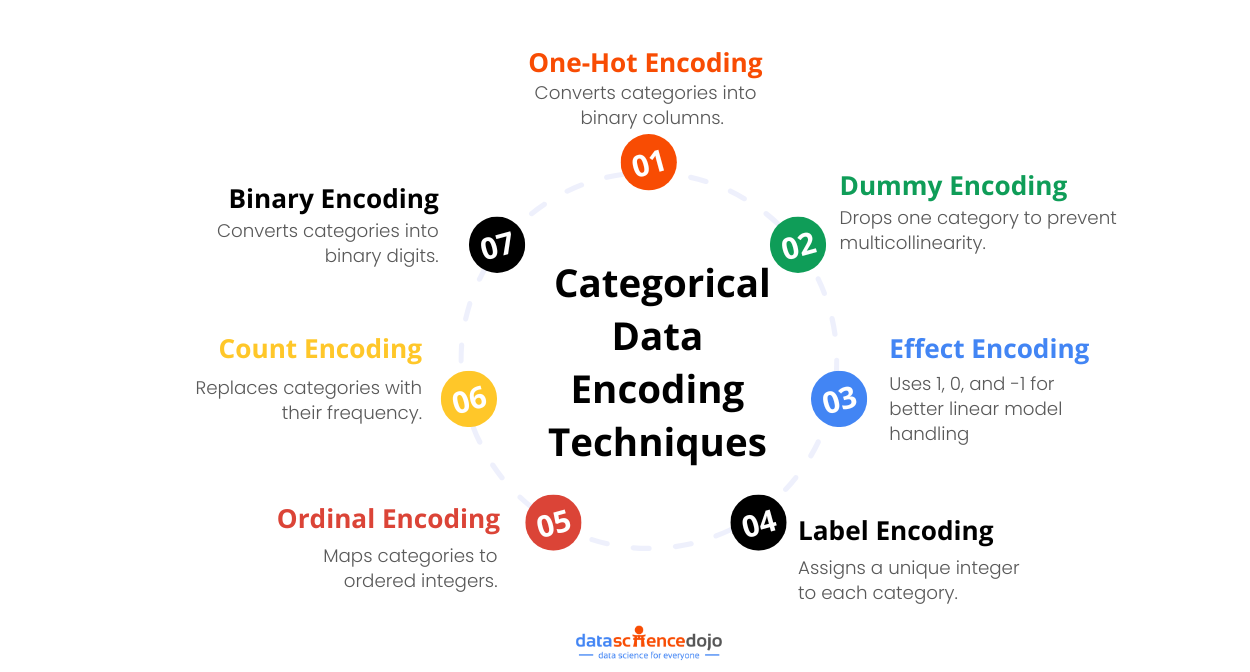

---

## <span style="color:orange; font-weight:semibold" >Types of Categorical Data

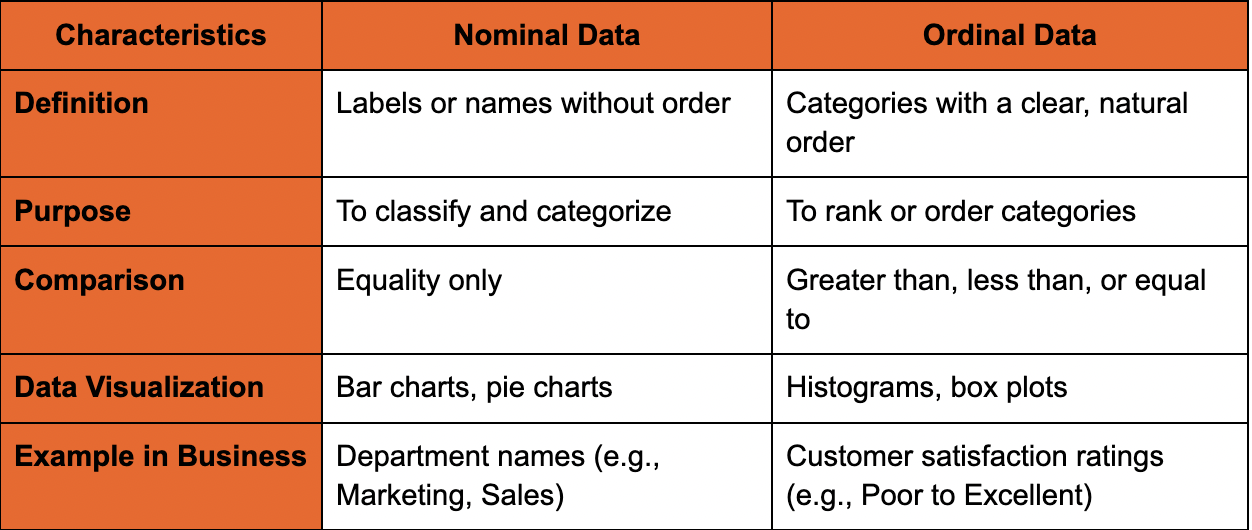
---

## <span style="color:orange; font-weight:semibold">We will focus on Label and One-Hot Encoding

1. <span style="color:purple">Label Encoding</span>           
        --> Assigns a unique integer to each category           
      
      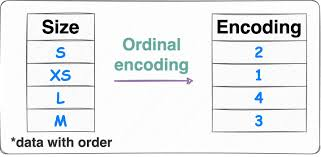
      
    
    

 2. <span style="color:purple">One-Hot Encoding</span>         
       --> Creates a new binary (0 or 1) column for each category, where '1' or 'True' represents hot.           
      
      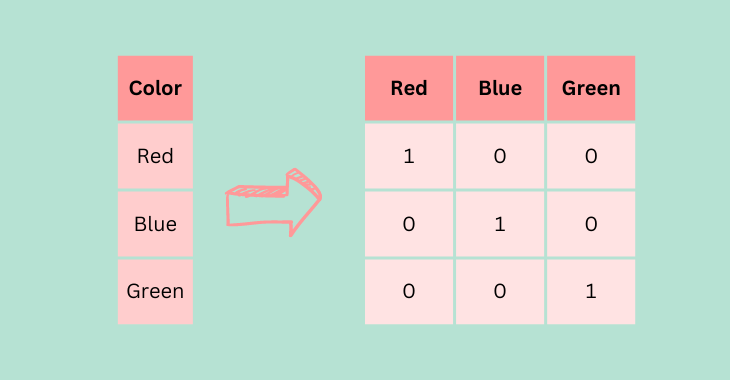


---


# <span style="color:purple; font-weight:semibold">Multicollinearity     

 1. <u style="color:blue">Two or more independent variables</u> are <u style="color:blue">highly correlated</u>, meaning one can be linearly predicted from the others with high accuracy.    
 2. <u style="color:blue">Introduces inaccuracy</u> when using One-Hot encoding in Linear Regression.    
 3. To tackle this we intentionally <u style="color:blue">drop one column randomly</u> from the One-Hot Encoded columns to reduce (sometime eliminate) multicollinearity.   

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv("./assets/files/homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


**<span style="color:purple; font-weight:semibold"> 1. Using pandas to create dummy variables**

In [108]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [109]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [110]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


**<span style="color:purple; font-weight:semibold"> IMPORTANT !  Dummy Variable Trap**

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you**

In [111]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [112]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [113]:
y = final.price

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [115]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [117]:
model.score(X,y)

0.9573929037221872

In [118]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [119]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

**<span style="color:purple; font-weight:semibold"> 2. Using sklearn OneHotEncoder**

In [120]:
#First we use label encoder to convert town names into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [122]:
X = dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [123]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [124]:
# Now use one hot encoder to create dummy variables for each of the town
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')  # This line tells the encoder to use One-Hot encoder to perform the transformation on the first column only and leave the rest of the columns as it is. 'town' is just a name we are giving to this step.

In [125]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [126]:
X = X[:,1:] # Syntax for dropping first column to avoid dummy variable trap or Multicollinearity
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [127]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [128]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [129]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])